In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 

In [18]:
df=pd.read_csv("../../../data/Salary_Level.csv")
df.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
## select numeric datatypes
df_numeric=df.select_dtypes(include=['number'])

## Corealtion of Numeric type
numeric_corr=df_numeric.corr()
numeric_corr

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


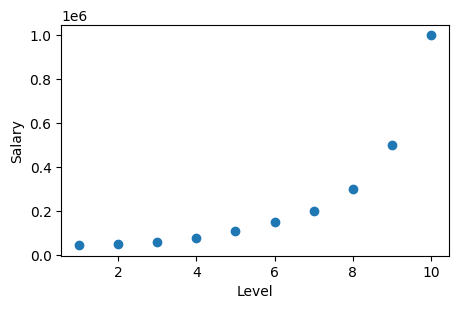

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(df["Level"],df["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [7]:
x=df[["Level"]]
y=df[["Salary"]]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
pf=PolynomialFeatures(degree=2)
pf.fit(x)
x=pf.transform(x)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.score(x_test,y_test)*100

46.080914017915745

In [15]:
prd=lr.predict(x)

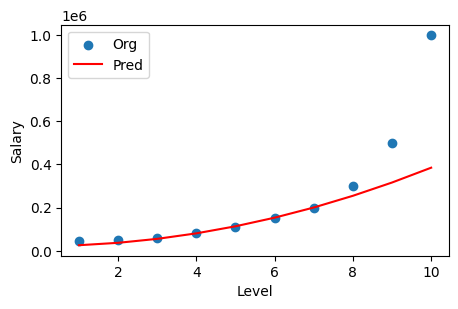

In [16]:
plt.figure(figsize=(5,3))
plt.scatter(df["Level"],df["Salary"])
plt.plot(df["Level"],prd,color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["Org","Pred"])
plt.show()

In [19]:
test=pf.transform([[4]])
test
lr.predict(test)

F:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[80000.]])

### Use Equation

y=m1x1+m2x2^2+c